## STK-IN9300 - Assignment 1
### By: Oda Langrekken



### Dataset

For this assignment I chose the Titanic Dataset, which can be downloaded from [Kaggle](https://www.kaggle.com/competitions/titanic/data?select=train.csv). The dataset contains data about 891 of the passengers on the Titanic. Each row of the dataset corresponds to one passenger, and carries information about this passenger such as the passengers's gender, age and whether the passenger survived the Sinking of the Titanic or not. As certain passengers were more likely to survive than others, this dataset can be used for classification tasks.  

In this project the data is analyzed using python and pandas dataframes.

Let's have a closer look at the data. 

In [1]:
# Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option("display.precision", 2)

In [2]:
# Read in data
data = pd.read_csv('titanic/train.csv')
# Print first five rows
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


The table above displays the first five rows of the dataset. There are 12 columns.

##### Categorical:


**Survived** - 1 if the passenger survived and 0 otherwise.    
**Pclass** - the class the passenger travelled on, 1=1st class (most expensive), 2=2nd class and 3=3rd class (least expensive).  
**Embarked** - port of embarkation, C = Cherbourg; Q = Queenstown; S = Southampton.    
**Sex** - the passenger's sex.  

**PassengerId** - a unique Id for each passenger.    
**Name** - the name of the passenger.    
**Ticket** - the passenger's ticket number.    
**Cabin** - the passenger's cabin.    


##### Numerical discrete:

**SibSp** - number of siblings or spouses of the passenger that are also on board.  
**Parch** - number of parents or children of the passengert that are also on board.  

##### Numerical continuous:

**Age** - age of the passenger in years  
**Fare** - fare paid by the passenger in dollars  

### Problem 1 - Summarizing data in a table

To summarize the quantitative data we can use the `describe`-method of the pandas dataframe.

In [3]:
data[['Age', 'SibSp', 'Parch', 'Fare']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,714.0,29.70,14.53,0.42,20.12,28.00,38.0,80.00
SibSp,891.0,0.52,1.10,0.00,0.00,0.00,1.0,8.00
Parch,891.0,0.38,0.81,0.00,0.00,0.00,0.0,6.00
Fare,891.0,32.20,49.69,0.00,7.91,14.45,31.0,512.33


The categorical data is slightly more difficult to summarize using the pandas library.   

For readability the categorical data is summarized in the markdown table below. The code used to find the different values is at the end of the project.

| Categorical  	| N/891 (%) 	|
|:-------------	|-----------	|
| **Sex**      	|	            |
| Female       	| 314 (35)      |
| **Pclass**   	|           	|
| 1            	|216 (24)
| 2            	|184 (21)   	|
| 3            	|491 (55)|
| **Embarked**  |               |
| Cherbourg (C) |168 (19)               |
| Queenstown (Q) |77 (9)              |
| Southampton (S)| 644 (72)             |
| **Survived** 	|           	|
| 1            	|342 (38)  	|

### Problem 2 and 3 - Visualizing data

### How does passenger class affect survival?
Anyone who has seen the Titanic movie knows that first class passenger were more likely to survive than third class passengers. Does the data confirm this?

#### Bad plot
To answer our question we make a pie chart to visualize the number of survived passengers per class.



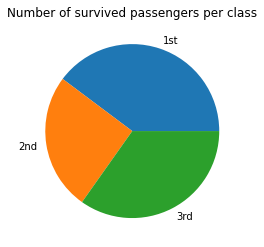

In [4]:
survival_per_class = data.groupby('Pclass')['Survived'].sum()

plt.pie(x=survival_per_class.values, labels=['1st', '2nd', '3rd']);
plt.title('Number of survived passengers per class');

#### Why is this plot bad?

Pie charts are generally not the best plot type to use when visualizing data. It is hard to tell the difference in size between the different parts of the circle. In this plot it is clear that the 2nd class was the class where the fewest passengers survived. But which is bigger of the 1st class and the 3rd class? By eye it is difficult to compare the sizes.     

More importantly: this plot does not answer our question. We wanted to know if passengers of certain classes were more likely to survive than others. Here the plot shows the total number of survived passengers per class. As the passengers are not evenly distributed on the three classes, this plot does not tell us anything about probability for survival. Looking at this plot you might conclude that class did not affect the passenger's survival chance. The next plot will show us that this conclusion is wrong. The pie chart does not reflect the difference in survival rate between the three classes, but rather that there were more passengers travelling by 3rd class than 1st class. 

#### Better plot
The pie chart did not answer our question. We know plot the ratio of passengers that survived per class in a bar plot.

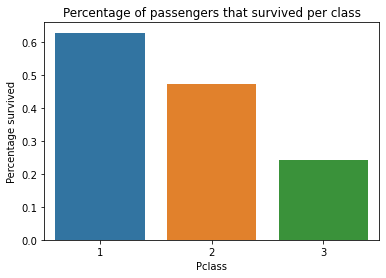

In [5]:
ax = sns.barplot(data=data, x='Pclass', y='Survived', ci=None);
plt.ylabel('Percentage survived');
plt.title('Percentage of passengers that survived per class');

##### Why is this plot better?
Our plot shows the ratio of passengers that survived per class. Because we calculate the ratio the difference in the number of passengers per class no longer affects our plot. We can now clearly see that 1st class passengers were most likely to survive, and that 3rd class passengers were the least likely to survive.  

Additionally it is easier to compare the heights of the bars than it is to compare the size of pie parts. The numbers on the y-axis make it possible to read the actual survival probability of each class. Just by looking at this plot we can tell that the survival probability was about 47% for passengers travelling on 2nd class, and that a passenger on 1st class was more than twice as likely to survive as a passenger on the 3rd class.

### How does the fare affect survival rate?
From the previous plot we know that people in 1st class were more likely to survive than the people in 3rd class. People in 1st class also paid a higher fare than the people in 2nd and 3rd class. So what is the relationship between fare and probability for survival?

#### Removal of outlier
There is a passenger who paid $512 in fare. This is an extreme outlier.\
As this outlier stretches the scale of the plots and makes it harder to see the distribution of the rest of the data, I have removed this outlier when creating the following plots.



#### Bad Plot - scatter plot

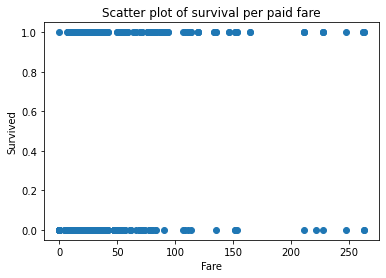

In [6]:
#Remove outlier
data_new = data[data.Fare < 500]
plt.scatter(data_new['Fare'], data_new['Survived']);
plt.xlabel('Fare');
plt.ylabel('Survived');
plt.title('Scatter plot of survival per paid fare');

##### Why is the scatter plot bad? 
It is hard to see pattern in this plot. We expect passengers who paid a high fare to be more likely to survive, but there are also low-fare passengers who survive. The scatter plot displays a dot for each distinct observation in the dataset, but it does not tell us anything about how many observations each dot represents. So as there are many data point in the data set and there are low-fare passengers who survived and high-fare passengers who did not survive, the scatter plot does not exhibit any relationship between paid fare and probability of survival.  

#### Better plot - a box plot



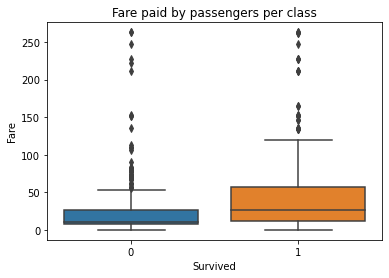

In [7]:
sns.boxplot(data=data_new, x='Survived', y='Fare');
plt.title('Fare paid by passengers per class');

##### Why is this plot better?
The scatter plot showed us that there are both low-fare and high-fare passengers who survived, and both low-fare and high-fare passengers who did not survive. We can easily make the same conclusion by looking at this plot as the minimum fare amount is about the same for survivors and non-survivors and there are outliers from passengers that paid a very high fare in both groups.  
Because this plot contains information about how the data is spread out, we can learn a lot more from the box plot that we could learn from the scatter plot. The line in the center of the box shows the median. The median is higher for the survivors than for the non-survivors, which supports our previous conclusion that 3rd class passengers were the least likely to survive. We can also see that the third quartile and the maximum value (outliers excluded) are a lot higher for the survivors.  

The scatter plot showed us that paying a high fare doesn't garantuee survival, but the box plot shows us that it increases the odds.

### Extra material - code to find statistics for categorical variables

In [8]:
## Find how many women are on ship
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [9]:
## Find percentage of women on ship
data['Sex'].value_counts(normalize = True)

male      0.65
female    0.35
Name: Sex, dtype: float64

In [10]:
## Find how passengers are distributed on different classes
data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [11]:
## Find how passengers are distributed on different classes, percentage
data['Pclass'].value_counts(normalize=True)

3    0.55
1    0.24
2    0.21
Name: Pclass, dtype: float64

In [12]:
## Find out where passengers embarked
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [13]:
## Find out where passengers embarked, percentage
data['Embarked'].value_counts(normalize=True)

S    0.72
C    0.19
Q    0.09
Name: Embarked, dtype: float64

In [14]:
## Find how many passengers survived
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [15]:
## Find how many passengers survived, percentage
data['Survived'].value_counts(normalize=True)

0    0.62
1    0.38
Name: Survived, dtype: float64